# Машинное обучение, DS-поток
## Задание 1.6


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot` (ноутбуки `[0.1]_train_model.ipynb` и `[1.1]_modules.ipynb`).
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.

**Баллы за задание:**

* Реализация модулей — 10 баллов.
* Применение на реальных данных — 5 баллов.

<h1 align=center>
    Welcome в Глубокое обучение!
</h1>

<img src="https://www.analyticsinsight.net/wp-content/uploads/2019/01/AutoML-1024x695.jpg" width=500>

В этом задании как и в прошлом, **используя только `NumPy`** нужно реализовать несколько модулей для построения нейронной сети. 

Структура задания подразумевает выполнение 3-х `jupyter notebook`'ов:

**`[0.1]_train_model.ipynb`**: текущий ноутбук. В нем поясняется суть задания, описаны остальные ноутбуки и именно этот ноутбук нужно запустить, когда все слои уже реализованы;

**`[1.1]_modules.ipynb`**: ноутбук, в котором нужно непосредственно реализовать слои нейронной сети. А именно:

> Базовые концепции:
- [x] `Module`     $-$ абстрактный класс для компонент нейронной сети;
- [x] `Sequential` $-$ класс, содержащий в себе последовательность объектов класса `Module`.

> Слои:
- [x] `Linear`     $-$ линейный слой;
- [x] `SoftMax`    $-$ слой, вычисляющий операцию *softmax*;
- [x] `LogSoftMax` $-$ слой, вычисляющий операцию *log(softmax)*;
- [ ] *(2 балла)* `Dropout` &mdash; слой дропаута;
- [ ] *(3 балла)* `BatchNormalization` &mdash; слой для работы с батч-нормализацией;
- [ ] *(1 балл)* `Scaling` &mdash; слой для работы с батч-нормализацией;
- [ ] *(1 балл)* `Flatten` &mdash; слой, который просто разворачивает тензор любой размерности в одномерный вектор.

> Функции активации (тоже являются слоями, но выделены в отдельную секцию для удобства):
- [x] `ReLU`      $-$ функция активации *Rectified Linear Unit*;
- [ ] *(1 балл)* `LeakyReLU` &mdash;  функция активации Leaky Rectified Linear Unit;
- [ ] *(1 балл)* `ELU` &mdash; функция активации *Exponential Linear Unit*;

> Функции потерь:
- [x] `Criterion`  $-$ абстрактный класс для функций потерь;
- [x] `NLLCriterionUnstable` $-$ negative log-likelihood функция потерь (нестабильная версия, возможны числовые переполнения);
- [x] `NLLCriterion` $-$ negative log-likelihood функция потерь (стабильная версия).

> Оптимизаторы:
- [x] `SGD`  $-$ алгоритм стохастического градиентного спуска.
- [ ] *(1 балл)* &mdash; любой другой оптимизатор, который мы разбирали на лекции.

**Галочками** помечены те слои, которые **уже реализованы за вас**. Таким образом, задание состоит в реализации оставшихся слоёв (мы заботимся о вашем здоровье 🍀). 

**`[2.1]_test_modules.ipynb`**: ноутбук с юнит-тестами, который следует использовать для отладки ноутбука **`[1.1]_modules.ipynb`**.

**Всего за задание можно получить:**
- **10 баллов** за `[1]task8_modules.ipynb`
- **5 баллов** за `[0]task8_train_model.ipynb` (этот ноутбук)
- Суммарно: **15 баллов**

---

In [235]:
from google.colab import drive
drive.mount('/content/drive')

path_to_modules_notebook='/content/drive/MyDrive/Colab_Notebooks/DS/ML/6_ДЗ/[1.1]_modules.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
%run $path_to_modules_notebook

In [237]:
import time
from time import time, sleep
import warnings

from itertools import cycle, islice

from IPython import display

import numpy as np
import pandas as pd

import scipy.stats as sps

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(font_scale=1.5)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.optim import SGD as torch_sgd

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

## 1.2. Многоклассовая классификация: FashionMNIST (5 баллов = 2 + 2 + 1)

<p align=center>
<img src="https://www.researchgate.net/profile/Lina_Yao4/publication/325921786/figure/fig2/AS:640163516522496@1529638284313/Example-for-fashion-MNIST-Each-class-is-represented-by-nine-cases.png">
</p>

FashionMNIST $-$ это датасет, аналогичный MNIST'у (датасету рукописных цифр), но по своей сути чуть интереснее $-$ вместо цифр здесь элементы одежды. Это, конечно, не [DeepFashion](https://github.com/switchablenorms/DeepFashion2), но для проверки работы слоев подойдет.

Вместе с заданием идет архив `fashionmnist.zip`, распакуйте его в папку с этим ноутбуком (архив изначально скачан с [Kaggle Datasets](https://www.kaggle.com/zalando-research/fashionmnist)).

In [238]:
import subprocess

In [239]:
def upload_file_from_gdrive(gdrive_file_id, outfile) -> None:
    """
    Скачивает файл из Google Drive по ID.
    gdrive_file_id -- id файла на гугл-диске.
    outfile -- путь до файла, в котором будет сохранено изображение.
    """
    
    upload_cmd = (
        "wget --load-cookies /tmp/cookies.txt"
        " \"https://docs.google.com/uc?export=download&confirm=$("
        " wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies"
        f" --no-check-certificate 'https://docs.google.com/uc?export=download&id={gdrive_file_id}'"
        f" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\\1\\n/p')&id={gdrive_file_id}\" "
        f" -O {outfile} && rm -rf /tmp/cookies.txt"
    )
    subprocess.check_call(upload_cmd, shell=True)

def get_gdrive_file_id(link):
    return link.split('/')[5]

In [240]:
# Путь до zip-файла с даннными
ZIP_PATH = "fashionmnist.zip"

# Путь до папки с данными
DATA_PATH = "fashionmnist"

In [241]:
%%time

# Ссылка на архив с данными
link = "https://drive.google.com/file/d/1UR8L3k6iPZvyclzZTxt__KOeOMyb4h3g/view?usp=sharing"

# ID файла на диске
file_id = get_gdrive_file_id(link)
print("file ID:", file_id)

# Загрузка файла с диска
upload_file_from_gdrive(file_id, ZIP_PATH)
print(f"Данные загружены в {DATA_PATH}")

file ID: 1UR8L3k6iPZvyclzZTxt__KOeOMyb4h3g
Данные загружены в fashionmnist
CPU times: user 18.2 ms, sys: 23.3 ms, total: 41.5 ms
Wall time: 1.45 s


In [242]:
#!unzip $ZIP_PATH

В данном случае уже есть `.csv`-файлы, содержашие в себе "развернутые" в вектор-строку картинки (признаки) и столбец `label` (метки). Каждая картинка имеет размер $28 \times 28$. Значения (интенсивности цвета) в каждом пикселе $-$ целые числа от 0 до 255. 

Значения меток классов:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [243]:
train_df = pd.read_csv('FashionMNIST/fashion-mnist_train.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
test_df = pd.read_csv('FashionMNIST/fashion-mnist_test.csv')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


В трейне 60к картинок, в тесте 10к. В глубоком обучении и нейросетях в целом обычно не делают кросс-валидацию, потому что это долго и, следовательно, вычислительно затратно. Обычно выделяют `train`, `val` и `test` сеты: на `train` обучают, на `val` валидируют модели на предмет переобучения и подбирают гиперпараметры, на `test` измеряют итоговое качество. 

Убедимся, что данные уже перемешаны:

In [245]:
train_df['label'].values[:10]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8])

In [246]:
test_df['label'].values[:10]

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0])

Как видим, данные уже перемешаны, так что просто выделим под валидацию 1/5 часть трейна:

In [247]:
val_start_idx = -int(len(train_df)/5)

train_df = train_df[:val_start_idx]
val_df = train_df[val_start_idx:]

print(train_df.shape, val_df.shape)

(48000, 785) (12000, 785)


Разделим признаки и метки:

In [248]:
train_sample = train_df.drop(axis=1, labels=['label']).values
train_labels = train_df['label'].values
val_sample = val_df.drop(axis=1, labels=['label']).values
val_labels = val_df['label'].values
test_sample = test_df.drop(axis=1, labels=['label']).values
test_labels = test_df['label'].values

print('Train:', train_sample.shape, train_labels.shape)
print('Val:', val_sample.shape, val_labels.shape)
print('Test:', test_sample.shape, test_labels.shape)

Train: (48000, 784) (48000,)
Val: (12000, 784) (12000,)
Test: (10000, 784) (10000,)


Сразу преобразуем метки в OneHot:

In [249]:
def make_onehot(labels):
    '''
    Практикуемся делать OneHot-кодирование на PyTorch
    '''
    num_classes = len(np.unique(labels))
    y = torch.LongTensor(labels.astype('int')).view(-1, 1)
    y_ohe = torch.FloatTensor(y.shape[0], num_classes)
    y_ohe.zero_()
    y_ohe.scatter_(1, y, 1)
    return y_ohe

In [250]:
y_train_ohe = make_onehot(train_labels).numpy()
y_val_ohe = make_onehot(val_labels).numpy()
y_test_ohe = make_onehot(test_labels).numpy()

print(train_labels.shape, y_train_ohe.shape)
print(train_labels[:10])
print(y_train_ohe[:10])

(48000,) (48000, 10)
[2 9 6 0 3 4 4 5 4 8]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Задание (2 балла)

Добейтесь точности не менее 0.85 на тестовой выборке c помощью модели, реализованной на `numpy`. Попробуйте добавить в архитектуру:
- `Dropout`
- `BatchNorm`
- `LeakyReLU`, `ELU`, `SoftPlus`
- Попробуйте разные связки выходного слоя и лосса: `LogSoftmax->NLLCriterion` и `Softmax->NLLCriterionUnstable`

Можете использовать уже реализованные для синтетических данных функции `train_generator`, `train_model`  и `test_generator`, `test_model` из прошлого задания. Не забудьте поменять `SGD` на свой оптимизатор. Аналоничные функции из прошлого задания можно использовать для модели на `pytorch` далее.

Архитекутра модели и гиперпараметры:

In [251]:
num_features = train_sample.shape[1]
num_classes = y_train_ohe.shape[1]

net = Sequential()
net.add(Linear(num_features,2000))
net.add(BatchNormalization())
net.add(Scaling(2000))
net.add(LeakyReLU())
net.add(Dropout())
net.add(Linear(2000,num_classes))
net.add(BatchNormalization())
net.add(Scaling(num_classes))
net.add(LogSoftMax())
print(net)

criterion = NLLCriterion()

optimizer_config = {'learning_rate' : 1.5e-2, 'momentum': 0.9}
optimizer_state = {}

n_epoch = 10
batch_size = 128

Linear 784 -> 2000
BatchNormalization
Scaling
LeakyReLU
Dropout
Linear 2000 -> 10
BatchNormalization
Scaling
LogSoftMax



In [252]:
def train_generator(sample, labels, batch_size):
    '''
    Генератор батчей. 
    На каждом шаге возвращает `batch_size` объектов из `sample` и их 
    меток из `labels`.
    '''
    n_samples = sample.shape[0]
    # Перемешиваем в случайном порядке в начале эпохи
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    # Обратите внимание на yield вместо return
    # (если раньше не сталкивались с генераторами)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx], labels[batch_idx]

In [253]:
def train_model(
    model, 
    sample, y,
    criterion,
    opt_params, 
    opt_state, 
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из вашего мини-фреймворка. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из вашего мини-фреймворка
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            # Forward pass
            # Backward pass

            model.zero_grad_params()

            pred=model.forward(x_batch)
            #ниже в sgd мы используем loss and loss_history
            #в criterion def forward(self, input, target): Не перепутать порядок аругментов!
            loss=criterion.forward(pred,y_batch)
            
            model.backward(x_batch,criterion.backward(pred,y_batch))
            
            # Обновление весов
            SGD_momentum(model.get_parameters(), 
                model.get_grad_params(), 
                opt_params,
                opt_state)
            loss_history.append(loss)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

Обучение модели:

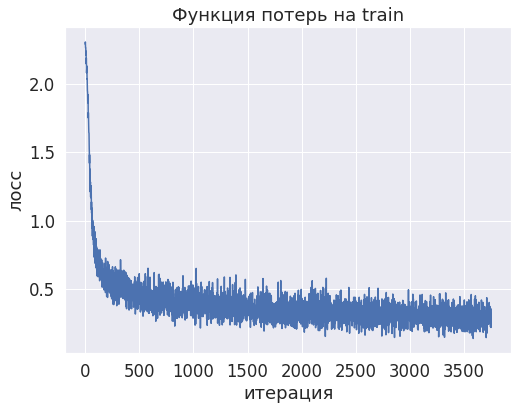

Current loss: 0.240815


In [254]:
net, loss_history = train_model(
    net, 
    train_sample, y_train_ohe, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

Предскажем на валидационной и тестовой выборке:

In [255]:
def test_model(model, test_sample):
    '''
    Тестирует модель на тестовой выборке.
    '''
    preds = []
    for test_batch in test_generator(test_sample):
        batch = model.forward(test_batch)
        batch = batch.argmax(axis=1).reshape(-1,1)
        preds.append(batch)
    preds = np.vstack(preds)
    return preds

In [256]:
def test_generator(sample):
    '''
    Батч-генератор для тестовых данных (без меток).
    '''
    n_samples = sample.shape[0]
    indices = np.arange(n_samples)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx]

In [257]:
val_predictions_my = test_model(net, val_sample).reshape(-1)
print(val_predictions_my.shape)
test_predictions_my = test_model(net, test_sample).reshape(-1)
print(test_predictions_my.shape)

(12000,)
(10000,)


In [258]:
print(
    f'Качество на Val моей собственной нейронной сети, обученной в течение {n_epoch} эпох: \
    {accuracy_score(val_labels, val_predictions_my):.3}'
)

Качество на Val моей собственной нейронной сети, обученной в течение 10 эпох:     0.897


In [259]:
print(
    f'Качество на Test моей собственной нейронной сети, обученной в течение {n_epoch} эпох: \
    {accuracy_score(test_labels, test_predictions_my):.3}'
)

Качество на Test моей собственной нейронной сети, обученной в течение 10 эпох:     0.876


Получили на val 0.897, на тесте 0.876. Что больше, чем 0.85, который просили нас перебить. Для данной модели использовался SGD_momentum+lr поменял, чтобы модель обучалась с более большим шагов (иначе она не хотела обучаться и лосс застревал у больших значений)+сделали Dropout+Batch_normalize, чтобы избавиться от переобучения.

Сравним с качеством аналогичной нейросети на PyTorch. Сначала обучим аналогичную torch-модель:

In [260]:
net_torch = nn.Sequential()
net_torch.add_module('linear_1', nn.Linear(num_features, 2000))
net_torch.add_module('BatchNormalization 1', nn.BatchNorm1d(2000))
net_torch.add_module('LeakyReLU', nn.LeakyReLU())
net_torch.add_module('Dropout', nn.Dropout())
net_torch.add_module('linear_2', nn.Linear(2000,num_classes))
net_torch.add_module('BatchNormalization 2', nn.BatchNorm1d(num_classes))
net_torch.add_module('LogSoftMax', nn.LogSoftmax())
print(net_torch)


criterion = torch.nn.NLLLoss()
optimizer = torch_sgd(net_torch.parameters(), lr=1.5e-2,momentum=0.9)

Sequential(
  (linear_1): Linear(in_features=784, out_features=2000, bias=True)
  (BatchNormalization 1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakyReLU): LeakyReLU(negative_slope=0.01)
  (Dropout): Dropout(p=0.5, inplace=False)
  (linear_2): Linear(in_features=2000, out_features=10, bias=True)
  (BatchNormalization 2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LogSoftMax): LogSoftmax(dim=None)
)


In [261]:
def train_model_torch(
    model, 
    sample, y,
    criterion,
    optimizer,
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из PyTorch. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из PyTorch
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            x_batch=torch.FloatTensor(x_batch)
            # Обнуляем градиенты с предыдущей итерации
            # Forward pass
            # Backward pass
            # Обновление весов
            
            optimizer.zero_grad()

            logits = model((x_batch))
            logits=torch.FloatTensor(logits)
            loss = criterion(logits, torch.Tensor(y_batch).type(torch.LongTensor))

            loss.backward()
            
            optimizer.step()
            
            loss_history.append(loss.data)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

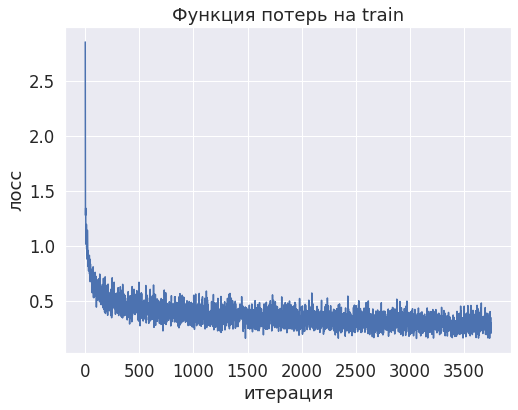

Current loss: 0.343568


In [262]:
net_torch, loss_history = train_model_torch(
    net_torch, train_sample, train_labels, 
    criterion,
    optimizer,
    n_epoch,
    batch_size
)

Сделаем предсказания и посчитаем метрику качества:

In [263]:
def test_torch(model, test_sample):
    '''
    Тестирует модель из PyTorch на тестовой выборке.
    '''
    preds = []
    with torch.no_grad():
        for test_batch in test_generator(test_sample):
            preds_batch = model(torch.FloatTensor(test_batch))
            preds_batch = preds_batch.argmax(axis=1).reshape(-1,1)
            preds.append(preds_batch.detach().numpy())
    preds = np.vstack(preds)
    return preds

In [264]:
val_predictions_torch = test_torch(net_torch, val_sample).reshape(-1)
print(val_predictions_torch.shape)
test_predictions_torch = test_torch(net_torch, test_sample).reshape(-1)
print(test_predictions_torch.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(12000,)
(10000,)


In [265]:
print(
    f'Качество на Val нейронной сети из PyTorch, обученной в течение {n_epoch} эпох: \
    {accuracy_score(val_labels, val_predictions_torch):.3}'
)

Качество на Val нейронной сети из PyTorch, обученной в течение 10 эпох:     0.903


In [266]:
print(
    f'Качество на Test нейронной сети из PyTorch, обученной в течение {n_epoch} эпох: \
    {accuracy_score(test_labels, test_predictions_torch):.3}'
)

Качество на Test нейронной сети из PyTorch, обученной в течение 10 эпох:     0.877


**Мини-вывод**: как хорошо видно, моя модель и аналогичная на PyTorch дает почти одинаковые результаты (PyTorch на 1 сотую получше), которые с легкостью перебивают плану 0.85 на тесте. Также мы использовали Dropout and BatchNorm1d, чтобы побороть переобучение, так как это эффективный способ борьбы с ним. Также я немного изменил lr, иначе моя модель просто не могла обучиться до нужного уровня.

Сейчас мы подавали в нейросеть "сырые" значения в пикселях. В компьютерном зрении обычно их масштабируют (нормализуют), чтобы значения во входном тензоре были от 0 до 1. Попробуйте поделить обучающую выборку на максимальное значение интенсивности пикселя и обучить сети (не забудьте отмасштабировать значения в тестовых тензорах тоже). Улучшилось/ухудшилось итогвое качество нейросетей? Как вы думаете, почему?

Также, как и всегда ранее, полезно поиграться со значениями гиперпараметров (количество нейронов в скрытом слое, `learning_rate` и т.д.).

In [267]:
net_torch = nn.Sequential()
net_torch.add_module('linear_1', nn.Linear(num_features, 2000))
net_torch.add_module('BatchNormalization 1', nn.BatchNorm1d(2000))
net_torch.add_module('LeakyReLU', nn.LeakyReLU())
net_torch.add_module('Dropout', nn.Dropout())
net_torch.add_module('linear_2', nn.Linear(2000,num_classes))
net_torch.add_module('BatchNormalization 2', nn.BatchNorm1d(num_classes))
net_torch.add_module('LogSoftMax', nn.LogSoftmax())
print(net_torch)


criterion = torch.nn.NLLLoss()
optimizer = torch_sgd(net_torch.parameters(), lr=1.5e-2,momentum=0.9)

Sequential(
  (linear_1): Linear(in_features=784, out_features=2000, bias=True)
  (BatchNormalization 1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakyReLU): LeakyReLU(negative_slope=0.01)
  (Dropout): Dropout(p=0.5, inplace=False)
  (linear_2): Linear(in_features=2000, out_features=10, bias=True)
  (BatchNormalization 2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LogSoftMax): LogSoftmax(dim=None)
)


In [268]:
max_pixel=np.max(train_sample)
train_sample_norm=train_sample/max_pixel
test_sample_norm=test_sample/max_pixel
val_sample_norm=val_sample/max_pixel

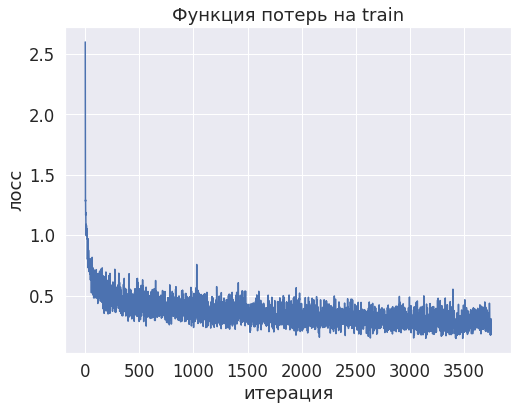

Current loss: 0.311016


In [269]:
net_torch, loss_history = train_model_torch(
    net_torch, train_sample_norm, train_labels, 
    criterion,
    optimizer,
    n_epoch,
    batch_size
)

Сделаем предсказания и посчитаем метрику качества:

In [270]:
val_predictions_torch = test_torch(net_torch, val_sample_norm).reshape(-1)
print(val_predictions_torch.shape)
test_predictions_torch = test_torch(net_torch, test_sample_norm).reshape(-1)
print(test_predictions_torch.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(12000,)
(10000,)


In [271]:
print(
    f'Качество на Val нейронной сети из PyTorch, обученной в течение {n_epoch} эпох: \
    {accuracy_score(val_labels, val_predictions_torch):.3}'
)

Качество на Val нейронной сети из PyTorch, обученной в течение 10 эпох:     0.9


In [272]:
print(
    f'Качество на Test нейронной сети из PyTorch, обученной в течение {n_epoch} эпох: \
    {accuracy_score(test_labels, test_predictions_torch):.3}'
)

Качество на Test нейронной сети из PyTorch, обученной в течение 10 эпох:     0.872


**Вывод**: видно, что метрика немного упала, но при этом она упала меньше, чем на 1 десятую. Одной из причин может быть, что батчи все же выбираются рандомно и у нас есть некоторая случайность. Также я настраивал оптимальные параметры своей модели, когда признаки были без нормировки. Так что было бы более честно для отнормированных признаков найти свои оптимальные параметры, которые, наверное, будут давать более хорошие точные результаты.

### Задание (2 балла)

Является ли разница в качестве вашей нейросети и сети на PyTorch статистически значимой? Проверьте, написав код/формулы в ячейках ниже.

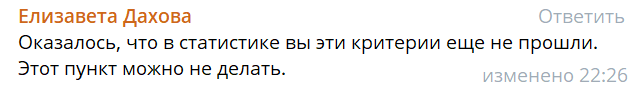

In [ ]:
#<ВАШ КОД ЗДЕСЬ>

### Задание (1 балл)

Выберите случайные 5 картинок и предскажите для них вероятности. Нарисуйте для каждой картинки в строчку:
1. Саму картинку
2. Гистограмму оценок вероятностей, которые получаются на выходе

*Примечание:* Удобно вывести по оси X названия классов вместо чисел. Соответствие классов номерам см. выше. 

In [233]:
id_to_name = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def plot_image_hist(pixel_vector, probas=None, true_label=None, figsize=(15,50)):
    plt.figure(figsize=figsize)
    n=len(pixel_vector)
    k=1
    for i in range(n):
         plt.subplot(n, 2, k)
         picture=pixel_vector[i].reshape(28,28)
         plt.imshow(picture)
         plt.title(str(true_label[i])+","+str(id_to_name[true_label[i]]))

         plt.subplot(n, 2, k+1)
         plt.bar(x=range(10),height=probas[i])
         plt.xticks(np.arange(10), labels = np.arange(10))
         plt.title('Гистограмма оценок вероятностей')
         k+=2

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


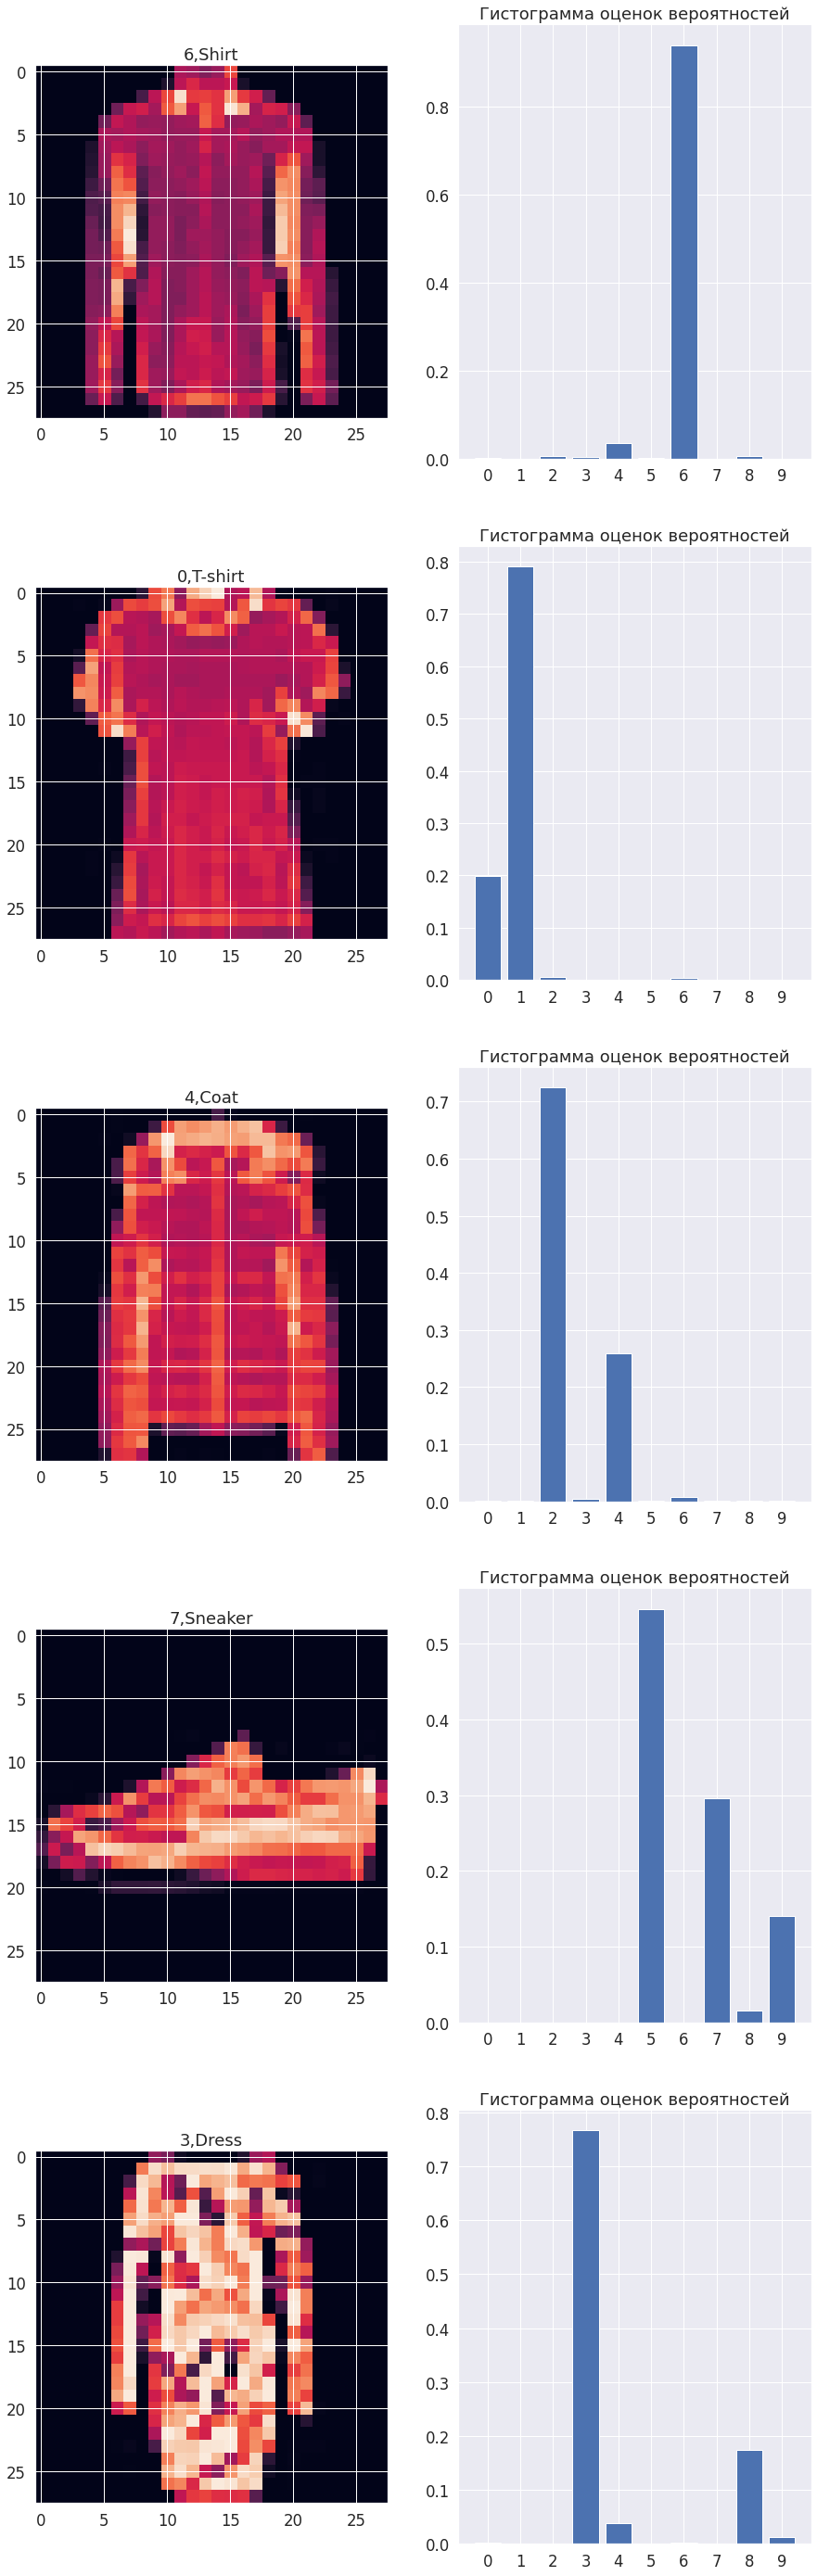

In [234]:
import random
index=random.sample(range(len(train_sample)),5)
pixel_vector=train_sample[index]
probas= torch.exp(net_torch(torch.FloatTensor(pixel_vector)))
probas=probas.detach().numpy()
plot_image_hist(pixel_vector, probas=probas, true_label=train_labels[index])

Мы выбрали 5 рандомных картинок, затем протестили на них нашу нейронку и получили гистограмму вероятностей. На некоторых гистограммах вероятность определенной вещи совпадает с действительностью, но иногда он ошибается,когда вещи чем-то похожи, например: перепутал кроссвоки с сандалиями. Но в целом он довольно хорошо понимает из какой категории вещь. Но при этом на одной из картинок он перепутал брюки с футболкой, в его оправдание, на футболку это слабо похоже на самом деле.

## Послесловие

Возможно, вам кажется, что вы построили какую-то игрушечную нейросеть, которая неспособна работать в "реальных" задачах. **Это не так.**

То, что вы реализовали, по сути составляет основную часть фреймворка PyTorch. Да, там реализовано еще много трюков для более эффективных вычислений, `autograd` и работа с GPU, но суть та же $-$ модули, где каждый предоставляет forward и backward (с помощь `autograd`).

В этом задании вы оперировали в основном полносвязными (`Linear`) слоями, чаще их называют Fully-Connected (FC). Они активно применяются и по сей день:
- В задачах компьютерного зрения (CV): как слои классификации в "голове" сверточных нейросетей 
- В задачах обработки естественного языка (NLP): как слои attention'а в Transformer'е
- В Reinforcement Learning (RL) иногда делают архитектуры исключительно из FC-слоев

## Полезные ссылки

При составлении этого Домашнего задания авторы вдохновлялись [заданием](https://github.com/yandexdataschool/Practical_DL/tree/spring2019/homework01) из курса "Deep Learning" Школы Анализа Данных.

- [Заметки главы ИИ в Tesla Andrej Karpathy по обучению нейросетей](http://karpathy.github.io/2019/04/25/recipe/)
- [Backpropagation на brilliant.org](https://brilliant.org/wiki/backpropagation/)
- См. ссылки в `[1]task8_modules.ipynb`